In [70]:
""" The following program will use Pandas to plot and get statistics from stock data."""
import datetime
import pandas
import pandas_datareader.data 
import matplotlib.pyplot
import matplotlib 
from pandas import Series, DataFrame
from matplotlib import style

# Will collect start till end date data.
initial_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

# Will collect Amazon's stock data.
dataframe = pandas_datareader.data.DataReader("AMZN", 'yahoo', initial_date, end_date) # preparing to call for AMZN stock data
dataframe.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015
2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966


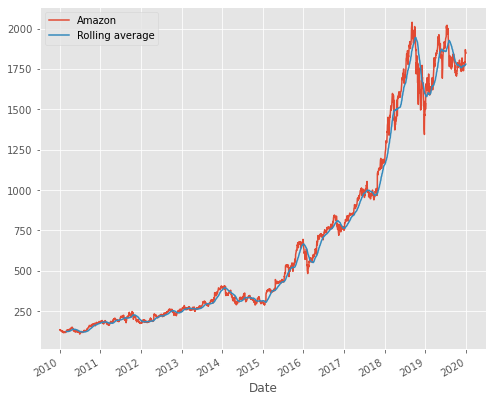

In [71]:
# Calculates the 'roling average'.
closing_price = dataframe['Adj Close']
rolling_average = closing_price.rolling(window=40).mean()

%matplotlib inline

# Adjusts length and height of PLT. 
matplotlib.rc('figure', figsize=(8, 7))
matplotlib.__version__

# Creates the 'rolling average' graph.
style.use('ggplot')
closing_price.plot(label='Amazon')
rolling_average.plot(label='Rolling average')
matplotlib.pyplot.legend()

In [72]:
# Compares IBM to its competitors.
dataframe_competition = pandas_datareader.data.DataReader(['AAPL', 'GOOGL', 'IBM', 'MSFT', 'AMZN', 'ORCL'],'yahoo',start=initial_date,end=end_date)['Adj Close']
dataframe_competition.tail() 

Symbols,AAPL,GOOGL,IBM,MSFT,AMZN,ORCL
Date,,,,,,
2019-12-24,282.831299,1344.430054,131.817245,156.515396,1789.209961,52.728722
2019-12-26,288.442780,1362.469971,131.748901,157.798309,1868.770020,52.856995
2019-12-27,288.333313,1354.640015,132.100464,158.086731,1869.800049,52.748455
2019-12-30,290.044617,1339.709961,129.698105,156.724243,1846.890015,51.998573
2019-12-31,292.163818,1339.390015,130.899277,156.833633,1847.839966,52.274845


In [73]:
returns_competition = dataframe_competition.pct_change()

corr = returns_competition.corr()

Text(0.5, 0, 'Returns Amazon')

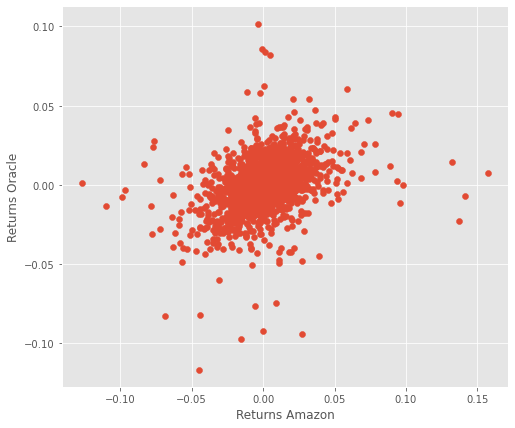

In [100]:
# Plots comparison of return distributions between companies.
matplotlib.pyplot.scatter(returns_competition.AMZN, returns_competition.ORCL)
matplotlib.pyplot.ylabel('Returns Oracle')
matplotlib.pyplot.xlabel('Returns Amazon')